## American Community Survey: Earnings by College Majors

<br></br>
<i>The [American Community Survey](https://www.census.gov/programs-surveys/acs/) is an initiative of the Census Bureau. It conducts surveys on communities across the 50 states and Puerto Rico, and aggregates data on key demographic details such as citizenship, ancestry, income, housing, employment, language proficiency, educational attainment, immigration, and disability. The results of the survey is used by the goverment to distribute about $675B in  federal and state funds. It is also used by the private and non-profit sectors to allocate funding.</i>

Please note that this notebook is more focused on getting familiar with different visualization tools from pandas (and a little bit from matplotlib and seaborn), than actual analysis.

## Dataset

The American Community Survey released the original data on job outcomes of students who graduated from college between 2010 and 2012. Each row in the dataset represents a different major in college, and contains information on gender diversity, employment rates, median salaries, and more. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Here are some of the columns in the dataset:

| Column Names | Description |
| :---- | :---- |
| Rank | Rank by median earnings (the dataset is ordered by this column) |
| Major_code | Major code |
| Major | Major description |
| Major_category | Category of major |
| Total | Total number of people with major |
| Sample_size | Sample size (unweighted) of full-time |
| Men | Male graduates |
| Women | Female graduates |
| ShareWomen | Women as share of total |
| Employed | Number employed |
| Median | Median salary of full-time, year-round workers  |
| Low_wage_jobs | Number in low-wage service jobs |
| Full_time | Number employed 35 hours or more |
| Part_time | Number employed less than 35 hours |
| Full_time_year_round | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35) |
| Unemployed | Number unemployed (ESR == 3) |
| Unemployment_rate | Unemployed / (Unemployed + Employed) |
| Median | Median earnings of full-time, year-round workers |
| P25th | 25th percentile of earnings |
| P75th | 75th percentile of earnings |
| College_jobs | Number with job requiring a college degree |
| Non_college_jobs | Number with job not requiring a college degree |
| Low_wage_jobs | Number in low-wage service jobs |

It is important to note that based on the [FiveThirtyEight](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), earnings figures are based on people employed full-time (35 hours or more), year-round (50 weeks or more) with positive earnings; except where noted, earnings also exclude those who are in school or who have graduate degrees.

## Goals

Using visualizations, the aim here is to explore our ACS dataset and answer questions such as:
- Do students in more popular majors make more money? (Using scatter plots)
- How many majors are predominantly male? Predominantly female? (Using histograms)
- Which category of majors have the most students? (Using bar plots)

In [1]:
import pandas as pd
import pandas.plotting as pdp

recent_grads = pd.read_csv('datasets/recent_grads.csv')
recent_grads.head().T

,0,1,2,3,4
Rank,1,2,3,4,5
Major_code,2419,2416,2415,2417,2405
Major,PETROLEUM ENGINEERING,MINING AND MINERAL ENGINEERING,METALLURGICAL ENGINEERING,NAVAL ARCHITECTURE AND MARINE ENGINEERING,CHEMICAL ENGINEERING
Total,2339,756,856,1258,32260
Men,2057,679,725,1123,21239
Women,282,77,131,135,11021
Major_category,Engineering,Engineering,Engineering,Engineering,Engineering
ShareWomen,0.120564,0.101852,0.153037,0.107313,0.341631
Sample_size,36,7,3,16,289
Employed,1976,640,648,758,25694


In [2]:
recent_grads.tail(6).T

,167,168,169,170,171,172
Rank,168,169,170,171,172,173
Major_code,3302,3609,5201,5202,5203,3501
Major,COMPOSITION AND RHETORIC,ZOOLOGY,EDUCATIONAL PSYCHOLOGY,CLINICAL PSYCHOLOGY,COUNSELING PSYCHOLOGY,LIBRARY SCIENCE
Total,18953,8409,2854,2838,4626,1098
Men,7022,3050,522,568,931,134
Women,11931,5359,2332,2270,3695,964
Major_category,Humanities & Liberal Arts,Biology & Life Science,Psychology & Social Work,Psychology & Social Work,Psychology & Social Work,Education
ShareWomen,0.629505,0.637293,0.817099,0.799859,0.798746,0.87796
Sample_size,151,47,7,13,21,2
Employed,15053,6259,2125,2101,3777,742


In [3]:
recent_grads.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,173.0,87.000000,50.084928,1.0,44.000000,87.000000,130.000000,173.000000
Major_code,173.0,3879.815029,1687.753140,1100.0,2403.000000,3608.000000,5503.000000,6403.000000
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Sample_size,173.0,356.080925,618.361022,2.0,39.000000,130.000000,338.000000,4212.000000
Employed,173.0,31192.763006,50675.002241,0.0,3608.000000,11797.000000,31433.000000,307933.000000
Full_time,173.0,26029.306358,42869.655092,111.0,3154.000000,10048.000000,25147.000000,251540.000000
Part_time,173.0,8832.398844,14648.179473,0.0,1030.000000,3299.000000,9948.000000,115172.000000


Based on a quick look at the dataset, these observations seem to hold:

- Top college majors seem to be in Engineering (7 out of 9), with Actuarial Science and Astronomy and Astrophysics as exceptions.
- Top majors seem to have a bigger share of men (8 out of 9), with 6 out of 9 having about 80 - 85% men in the population, and 7 out of 9 with about 2/3 of the population or greater. The only exception, Astronomy and Astrophysics, has close to an even split.
- There seems to be a correlation of sex and rank in the outliers, as the bottom 6 majors all have a women majority.
- The top median salary (Petroleum Engineering) is 5 times greater than the bottom median salary (Library Science).
- The unemployment rate doesn't seem to be correlated to rank.

Here are also some of the updates that can make the dataset more useful:

- Remove the row with null / NaN on the `Men`, `Women` and `Sharewomen` columns
- Create `ShareMen`, which is the counterpart of ShareWomen
- Create a `Sample_rate`, which is `Sample_size` divided by `Total` 

### Data Cleaning

In [4]:
# Use np.NaN != np.NaN to filter out np.NaN values
recent_grads[recent_grads['Men'] != recent_grads['Men']]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [5]:
recent_grads = recent_grads.dropna()
recent_grads.shape

(172, 21)

In [6]:
# Create the `ShareMen` column
recent_grads['ShareMen'] = 1 - recent_grads['ShareWomen']
recent_grads['ShareMen'][:5]

0    0.879436
1    0.898148
2    0.846963
3    0.892687
4    0.658369
Name: ShareMen, dtype: float64

In [7]:
# Create the `Sample_rate` column
recent_grads['Sample_rate'] = recent_grads['Sample_size'].astype(float) / recent_grads['Total'].astype(float)
recent_grads['Sample_rate'][:5]

0    0.015391
1    0.009259
2    0.003505
3    0.012719
4    0.008958
Name: Sample_rate, dtype: float64

In [8]:
recent_grads.describe().T[-2:]

,count,mean,std,min,25%,50%,75%,max
ShareMen,172.0,0.477777,0.231205,0.031046,0.296701,0.465976,0.663974,1.000000
Sample_rate,172.0,0.009091,0.003819,0.001614,0.006602,0.008809,0.011210,0.032258


## Bar Plots

Using bar plots, this section visualizes differences between top and bottom outliers. The goal is to provide visual representations for:

- the percentages of women (`ShareWomen`) from the first ten rows and last ten rows of the recent_grads dataframe
- the unemployment rate (`Unemployment_rate`) from the first ten rows and last ten rows of the recent_grads dataframe

In [9]:
# setting defaults
figsize = (10,4)
blue = '#0b336c'

In [10]:
def plot_bar(col, rank='top', i=10):
    tt = '{}, {} 10 Rows'.format(col, rank).replace('_', ' ').title()
    if rank == 'top':
        labels = recent_grads[:i]['Major'].apply(lambda x: x.title())
        ax = recent_grads[:i][col]
    else:
        labels = recent_grads[-i:]['Major'].apply(lambda x: x.title())
        ax = recent_grads[-i:][col]

    ax.plot(kind='bar', figsize=figsize, color=blue, title=tt).set_xticklabels(labels=labels)

In [11]:
plot_bar('ShareWomen', 'top', 10)

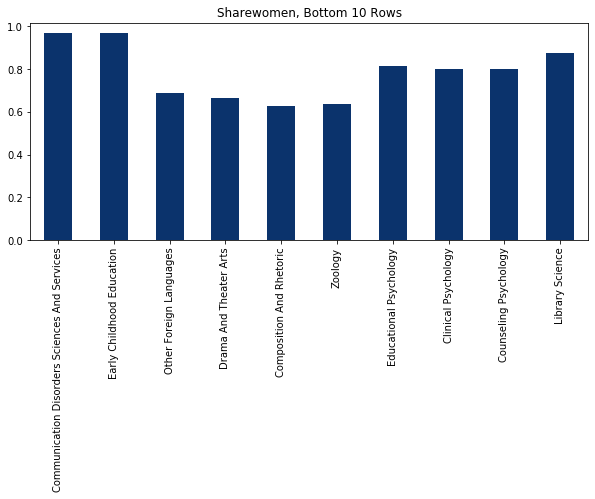

In [12]:
plot_bar('ShareWomen', 'bottom', 10)

The `ShareWomen` graphs echo an earlier observation. Majors with less share of women — having more men — dominate the ranks. On the other hand, the bottom ten majors are mostly dominated by women.

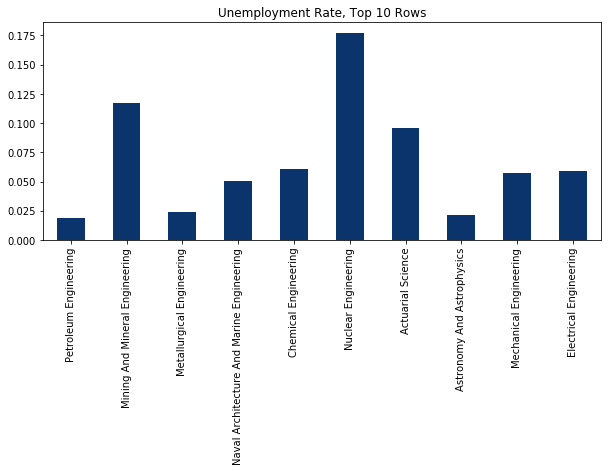

In [13]:
plot_bar('Unemployment_rate', 'top', 10)

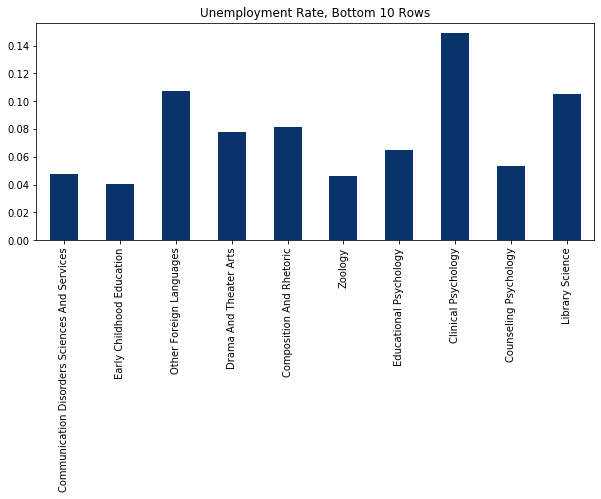

In [14]:
plot_bar('Unemployment_rate', 'bottom', 10)

In [15]:
recent_grads[recent_grads['Unemployment_rate'] == 0].T

,52,73,83,112,120
Rank,53,74,84,113,121
Major_code,4005,3801,3602,1106,2301
Major,MATHEMATICS AND COMPUTER SCIENCE,MILITARY TECHNOLOGIES,BOTANY,SOIL SCIENCE,EDUCATIONAL ADMINISTRATION AND SUPERVISION
Total,609,124,1329,685,804
Men,500,124,626,476,280
Women,109,0,703,209,524
Major_category,Computers & Mathematics,Industrial Arts & Consumer Services,Biology & Life Science,Agriculture & Natural Resources,Education
ShareWomen,0.178982,0,0.528969,0.305109,0.651741
Sample_size,7,4,9,4,5
Employed,559,0,1010,613,703


It is interesting to see that rank is not correlated to unemployment; rates vary wildly within the same top and bottom brackets. The five majors with 0 unemployment rate are also neither in the top or bottom groups. In fact, they're within the middle (second and third) quartiles.


## Scatter Plots

Using scatter plots, this section visualizes relationships between attributes. The goal is to provide visual representations for questions like

    1. Do students in more popular majors make more money?
    2. Do students that majored in subjects that were majority female make more money?
    3. Is there any link between the number of full-time employees and median salary?

In [16]:
def relate(x,y):
    xlabel = x.replace('_',' ').title()
    ylabel = y.replace('_',' ').title()
    title = '{} vs. {}'.format(xlabel,ylabel)
    ax = recent_grads.plot(x=x, y=y, kind='scatter', title=title, figsize=figsize, color=blue)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

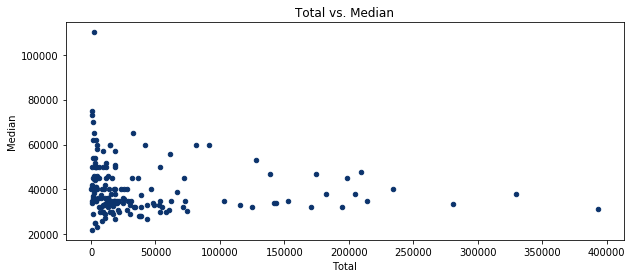

In [17]:
relate('Total', 'Median')

In [18]:
recent_grads[recent_grads['Total'] == recent_grads['Total'].max()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen,Sample_rate
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,28169,0.083811,31500,24000,41000,125148,141860,48207,0.220067,0.006563


There seems to be little to no correlation between popularity and income. Although a potential factor that draws student enrolment, income seems to be more of an optional influence. Case in point: Pyschology, the most popular course, is in the lowest quartile for median earnings.

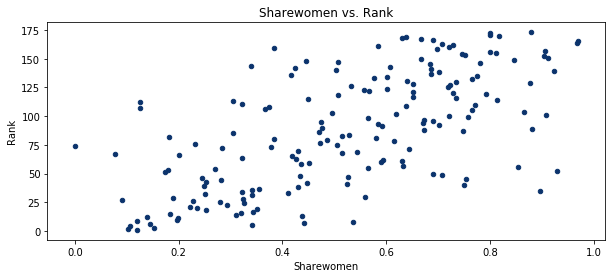

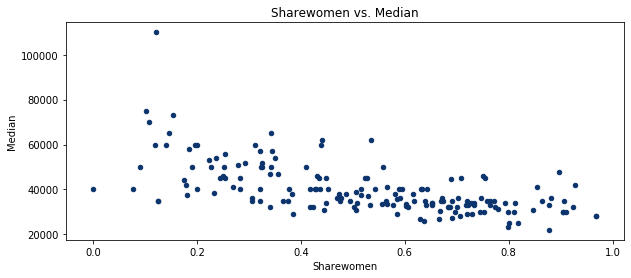

In [19]:
relate('ShareWomen', 'Rank')
relate('ShareWomen','Median')

Majors that have majority women populations seem to make less money. The lowest five majors in terms of median income all have more than 60% women population, with four of those having about 80% (or more) share of women graduates.

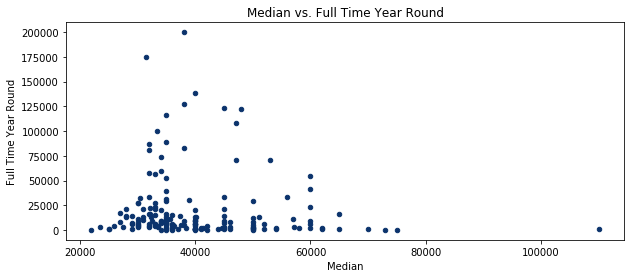

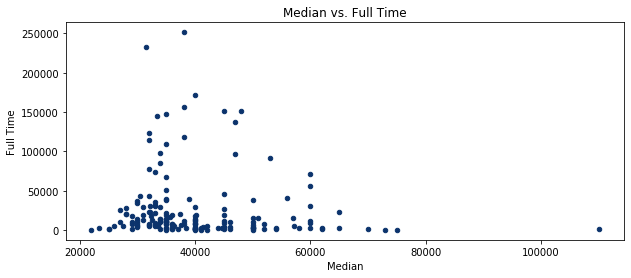

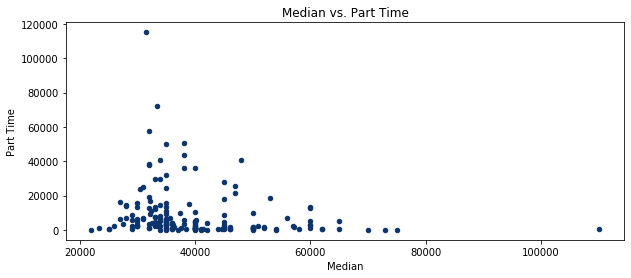

In [20]:
relate('Median', 'Full_time_year_round')
relate('Median', 'Full_time')
relate('Median', 'Part_time')

Based on the plots above, it looks like there is little to no correlation between the number of full time employees—including full time year-round—with the median salary. Factors such as position or title, company location, and total number of hours (for hourly employees) all impact one's earnings.


## Histograms

Using histograms to showcase frequencies and distributions, this section provides visual cues in answering the following questions:

    1. What percent of majors are predominantly male? Predominantly female?
    2. What's the most common median salary range?

In [21]:
def explore(x):
    title = x.replace('_',' ').title().upper()
    recent_grads[x].plot(kind='hist', title=title, fontsize=12)
    recent_grads[x].hist(bins=10, color=blue, grid=False, figsize=figsize)

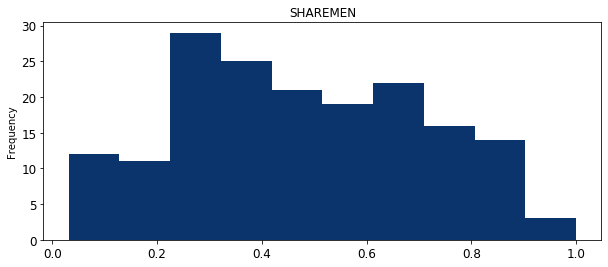

In [22]:
explore('ShareMen')

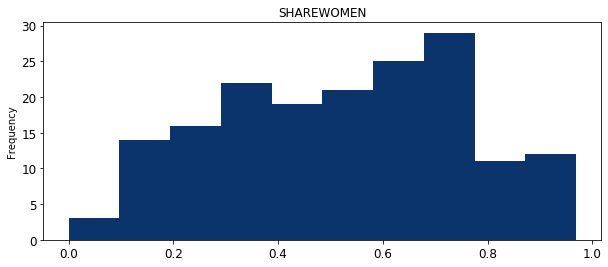

In [23]:
explore('ShareWomen')

Based on the histograms of `ShareMen` and `ShareWomen`, it seems like there is a little less than half of the majors dominated by men. The distribution of `ShareMen` skews more towards the left side (which indicates less than 50% of the population share), while the `ShareWomen` skews more to the right.

In [24]:
# Count of majors with predominantly male population
mm_ct = recent_grads[recent_grads['ShareMen'] > recent_grads['ShareWomen']]['ShareMen'].shape[0]
mm_rt = round(mm_ct / len(recent_grads.iloc[:,0]), 2) * 100.00
print('There are {} majors with more men than women. This makes up {}% of all majors.'.format(mm_ct,mm_rt))

There are 76 majors with more men than women. This makes up 44.0% of all majors.


The quick calculation above confirms this. About 44% of the majors have men as the majority, while the remaining 56% (96) of the majors have mostly women in their populations. Of course, these numbers exclude the `Food Science` major (Code 1104) that was dropped earlier in this notebook, since it had no `Men`, `Women`, and `Total` data.

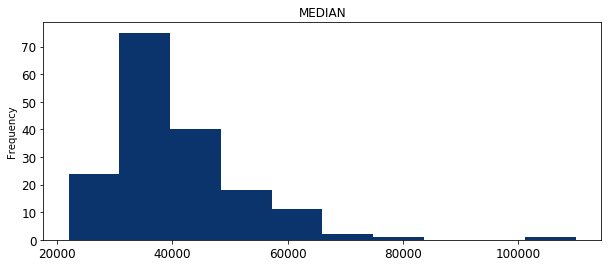

In [25]:
explore('Median')

## Scatter Matrix Plot

Scatter matrix plots allow for a quicker look at correlations. The exercises below are updated versions of some of the variables and correlations already explored above.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149de250>,
      dtype=object)

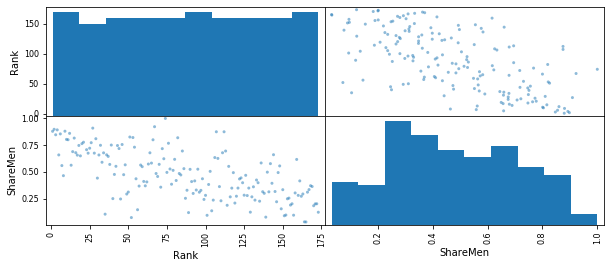

In [26]:
pdp.scatter_matrix(recent_grads[['Rank', 'ShareMen']], figsize=figsize, cmap='cividis_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fc67d0>,
      dtype=object)

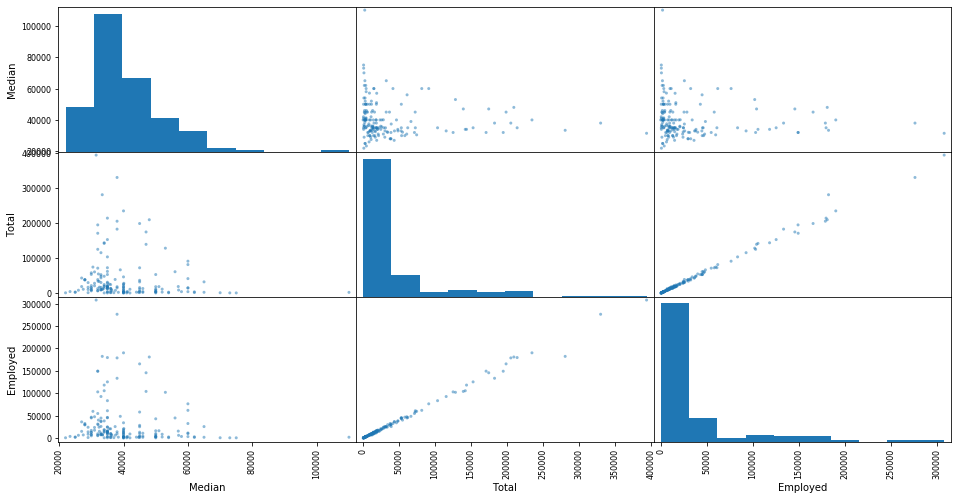

In [27]:
pdp.scatter_matrix(recent_grads[['Median', 'Total', 'Employed']], figsize=(16,8), cmap='cividis_r')

The first scatter matrix shows a strong correlation between `Rank` and `ShareMen`, which has already been discussed indirectly with the correlation between `ShareWomen` and `Rank` (and even `ShareWomen` and `Median`). On the other hand, the second graph demonstrates a very clear relationship between `Total` (count of graduates), and `Employed` (count of graduates with jobs).

## Appendix

Here are some extra coding exercises:

- Compare the number of men with the number of women in each category of majors (using a grouped bar plot)
- Explore the distributions of median salaries and unemployment rate (using a box plot)
- Visualize the columns that had dense scatter plots from earlier in the project (hexagonal bin plot)

Also included is a visualization of the strongest correlations between the various different aspects of the study, using a seaborn heatmap.

### Grouped Bar Plot

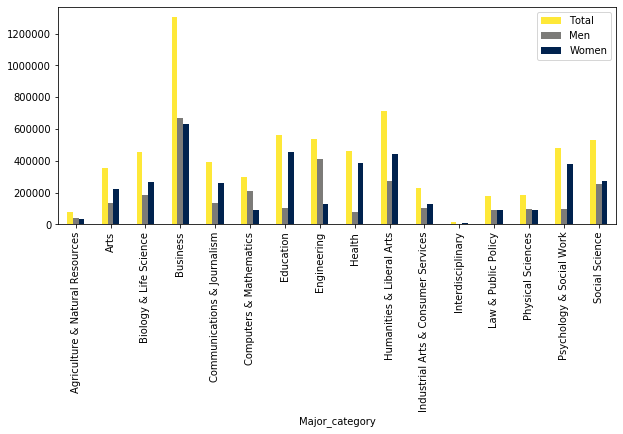

In [28]:
extra1 = recent_grads.iloc[:,3:7].groupby('Major_category').sum()
extra1.plot.bar(figsize=figsize, colormap='cividis_r')

### Box Plot

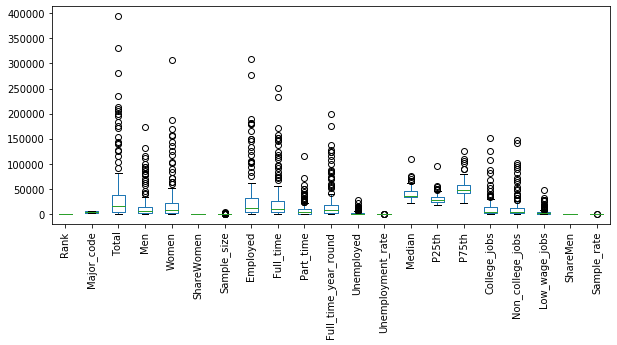

In [29]:
recent_grads.plot.box('Median', figsize=figsize, rot=90)

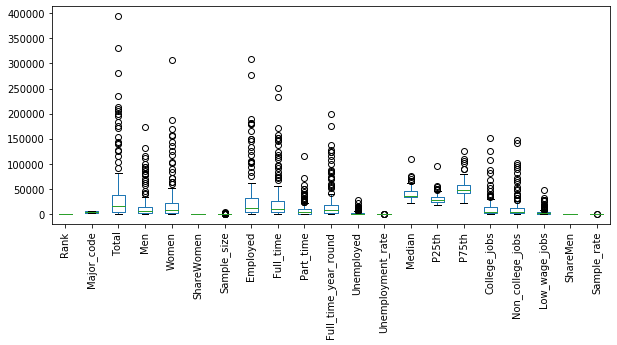

In [30]:
recent_grads.plot.box('Unemployment_rate', figsize=figsize, rot=90)

### Hexagonal Bin

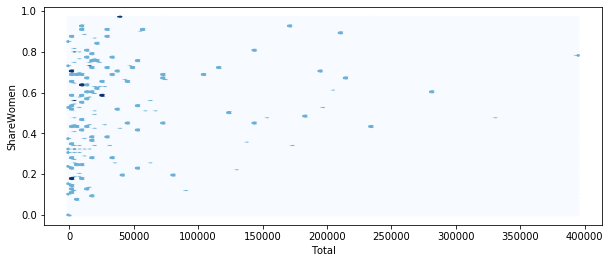

In [31]:
recent_grads.plot(x='Total', y='ShareWomen', kind='hexbin', figsize=figsize, colormap='Blues', colorbar=False)

### Heatmap

In [32]:
corr = recent_grads.corr()
corr.iloc[:,:11]

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round
Rank,1.000000,0.097195,0.071137,-0.094780,0.174913,0.643781,0.004590,0.066941,0.030748,0.190272,0.016402
Major_code,0.097195,1.000000,0.196784,0.179299,0.181459,0.259211,0.203375,0.197345,0.195857,0.191798,0.202203
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523
Sample_size,0.004590,0.203375,0.945575,0.875176,0.862606,0.097496,1.000000,0.964406,0.978362,0.824544,0.985212
Employed,0.066941,0.197345,0.996214,0.870605,0.944037,0.147547,0.964406,1.000000,0.995831,0.934418,0.991031
Full_time,0.030748,0.195857,0.989339,0.893563,0.917681,0.120200,0.978362,0.995831,1.000000,0.900711,0.998200
Part_time,0.190272,0.191798,0.950268,0.751592,0.954513,0.212290,0.824544,0.934418,0.900711,1.000000,0.880656


In [33]:
corr.iloc[:,12:]

,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen,Sample_rate
Rank,0.076671,-0.872303,-0.737419,-0.800817,0.048950,0.141661,0.200360,-0.643781,-0.198388
Major_code,0.137163,-0.167237,-0.165593,-0.083655,0.036486,0.229562,0.222541,-0.259211,-0.128572
Total,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510,-0.142999,0.000163
Men,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336,0.112014,0.047769
Women,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470,-0.297832,-0.032468
ShareWomen,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850,-1.000000,-0.396064
Sample_size,0.062955,-0.064475,-0.024429,-0.052256,0.701231,0.915335,0.860116,-0.097496,0.122093
Employed,0.071374,-0.104399,-0.066706,-0.083996,0.797193,0.941236,0.927122,-0.147547,0.023391
Full_time,0.066616,-0.079031,-0.042131,-0.061429,0.772135,0.933021,0.904714,-0.120200,0.045319
Part_time,0.112247,-0.187516,-0.152827,-0.155224,0.804673,0.909495,0.951525,-0.212290,-0.074442


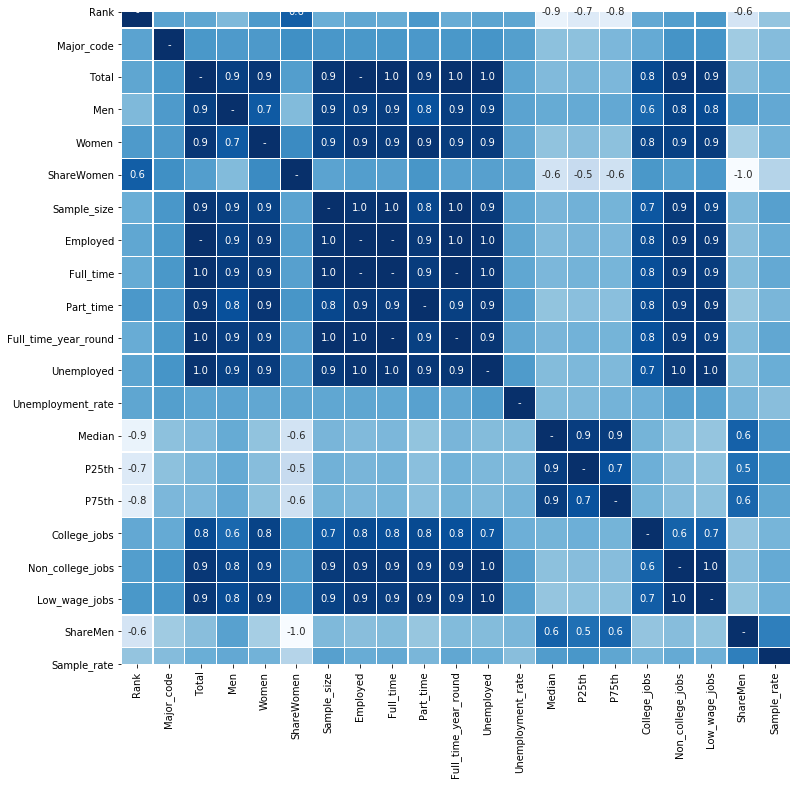

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,12))
ax = sns.heatmap(corr, cbar=False, annot=True, linewidths=.25, linecolor='#ffffff', cmap='Blues')

# format the text in the plot to make it easier to read
for text in ax.texts:
    t = float(text.get_text())
    if -0.50 < t < 0.50:
        text.set_text('')
    elif t == 1.0:
        text.set_text('-')
    else:
        text.set_text(round(t, 1))
    text.set_fontsize('medium')

plt.xticks(rotation=90, size='medium')
plt.yticks(rotation=0, size='medium')
plt.show()